# A Data-Driven Approach for Customer Lifetime Value (CLV) in E-Commerce

## Step1: Importing Packages and Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
import os
import joblib
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

## Step2: Importing Dataset

In [3]:
df = pd.read_csv(r'Datasets/Dataset.csv')

In [4]:
df.head()

,Education,Marital_Status,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Target
0,Graduate,Single,58138,0,663,58,1617,25,0,0,1,High-Value Frequent Shoppers
1,Graduate,Single,46344,2,113,38,27,6,0,0,0,Family-Oriented Budget Shoppers
2,Graduate,Partner,71613,0,312,26,776,21,0,0,0,High-Value Frequent Shoppers
3,Graduate,Partner,26646,1,139,26,53,8,0,0,0,Family-Oriented Budget Shoppers
4,Postgraduate,Partner,58293,1,161,94,422,19,0,0,0,Family-Oriented Budget Shoppers


In [5]:
df.shape

(2016, 12)

In [6]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Days_is_client',
       'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp',
       'Complain', 'Response', 'Target'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Education          2016 non-null   object
 1   Marital_Status     2016 non-null   object
 2   Income             2016 non-null   int64 
 3   Kids               2016 non-null   int64 
 4   Days_is_client     2016 non-null   int64 
 5   Recency            2016 non-null   int64 
 6   Expenses           2016 non-null   int64 
 7   TotalNumPurchases  2016 non-null   int64 
 8   TotalAcceptedCmp   2016 non-null   int64 
 9   Complain           2016 non-null   int64 
 10  Response           2016 non-null   int64 
 11  Target             2016 non-null   object
dtypes: int64(9), object(3)
memory usage: 189.1+ KB


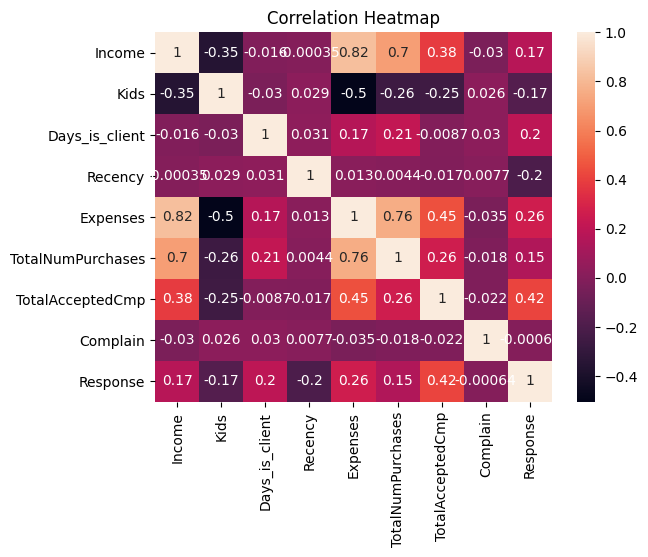

In [8]:
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
df.isnull().sum()

Education            0
Marital_Status       0
Income               0
Kids                 0
Days_is_client       0
Recency              0
Expenses             0
TotalNumPurchases    0
TotalAcceptedCmp     0
Complain             0
Response             0
Target               0
dtype: int64

In [10]:
labels = df['Target'].unique()
labels

array(['High-Value Frequent Shoppers', 'Family-Oriented Budget Shoppers',
       'Price-Conscious Minimal Shoppers'], dtype=object)

In [11]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Days_is_client',
       'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp',
       'Complain', 'Response', 'Target'],
      dtype='object')

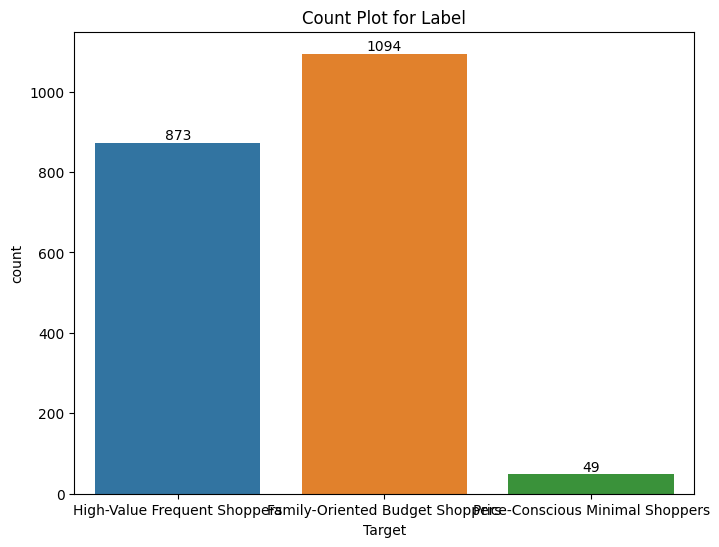

In [12]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Target', data=df)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), 'd'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count Plot for Label')
plt.show()


In [13]:
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])
        
df

,Education,Marital_Status,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Target
0,0,1,58138,0,663,58,1617,25,0,0,1,1
1,0,1,46344,2,113,38,27,6,0,0,0,0
2,0,0,71613,0,312,26,776,21,0,0,0,1
3,0,0,26646,1,139,26,53,8,0,0,0,0
4,1,0,58293,1,161,94,422,19,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0,1,26816,0,681,50,22,4,0,0,0,0
2012,0,0,61223,1,381,46,1341,18,0,0,0,1
2013,0,1,56981,0,155,91,1241,19,1,0,0,1
2014,1,0,69245,1,156,8,843,23,0,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Education          2016 non-null   int32
 1   Marital_Status     2016 non-null   int32
 2   Income             2016 non-null   int64
 3   Kids               2016 non-null   int64
 4   Days_is_client     2016 non-null   int64
 5   Recency            2016 non-null   int64
 6   Expenses           2016 non-null   int64
 7   TotalNumPurchases  2016 non-null   int64
 8   TotalAcceptedCmp   2016 non-null   int64
 9   Complain           2016 non-null   int64
 10  Response           2016 non-null   int64
 11  Target             2016 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 165.5 KB


In [15]:
# Assuming 'label' is the target variable
target_column = 'Target'

# Define X and Y
X = df.drop(columns=[target_column])
y = df[target_column]

In [16]:
X

,Education,Marital_Status,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response
0,0,1,58138,0,663,58,1617,25,0,0,1
1,0,1,46344,2,113,38,27,6,0,0,0
2,0,0,71613,0,312,26,776,21,0,0,0
3,0,0,26646,1,139,26,53,8,0,0,0
4,1,0,58293,1,161,94,422,19,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2011,0,1,26816,0,681,50,22,4,0,0,0
2012,0,0,61223,1,381,46,1341,18,0,0,0
2013,0,1,56981,0,155,91,1241,19,1,0,0
2014,1,0,69245,1,156,8,843,23,0,0,0


In [17]:
y

0       1
1       0
2       1
3       0
4       0
       ..
2011    0
2012    1
2013    1
2014    1
2015    0
Name: Target, Length: 2016, dtype: int32

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=77 )

In [19]:
X_train.shape

(1612, 11)

In [20]:
X_test.shape

(404, 11)

In [21]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [22]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 

    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# LASSO CLASSIFEIR

Model loaded successfully.
Lasso Classifier Accuracy    : 67.32673267326733
Lasso Classifier Precision   : 43.80952380952381
Lasso Classifier Recall      : 54.05921680993314
Lasso Classifier FSCORE      : 41.50151072873457

 Lasso Classifier classification report
                                   precision    recall  f1-score   support

    High-Value Frequent Shoppers       0.62      1.00      0.77       217
 Family-Oriented Budget Shoppers       1.00      0.31      0.48       175
Price-Conscious Minimal Shoppers       0.00      0.00      0.00        12

                        accuracy                           0.67       404
                       macro avg       0.54      0.44      0.42       404
                    weighted avg       0.77      0.67      0.62       404



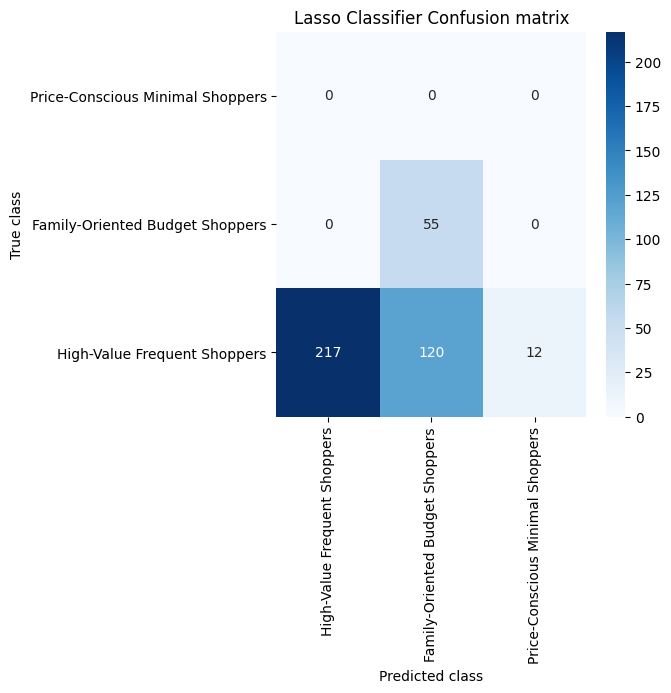

In [23]:
if os.path.exists('model/Lasso.pkl'):
    # Load the trained model from the file
    LC = joblib.load('model/Lasso.pkl')
    print("Model loaded successfully.")
    predict = LC.predict(X_test)
    calculateMetrics("Lasso Classifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    LC = Lasso()
    LC.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(LC, 'model/Lasso.pkl')
    print("Model saved successfully.")
    predict = LC.predict(X_test)
    calculateMetrics("Lasso Classifier", predict, y_test)

# Decision Tree Classifier

Model loaded successfully.
Decision Tree Classifier Accuracy    : 97.77227722772277
Decision Tree Classifier Precision   : 98.3963133640553
Decision Tree Classifier Recall      : 98.50951374207187
Decision Tree Classifier FSCORE      : 98.44894783004374

 Decision Tree Classifier classification report
                                   precision    recall  f1-score   support

    High-Value Frequent Shoppers       0.97      0.99      0.98       217
 Family-Oriented Budget Shoppers       0.98      0.97      0.97       175
Price-Conscious Minimal Shoppers       1.00      1.00      1.00        12

                        accuracy                           0.98       404
                       macro avg       0.99      0.98      0.98       404
                    weighted avg       0.98      0.98      0.98       404



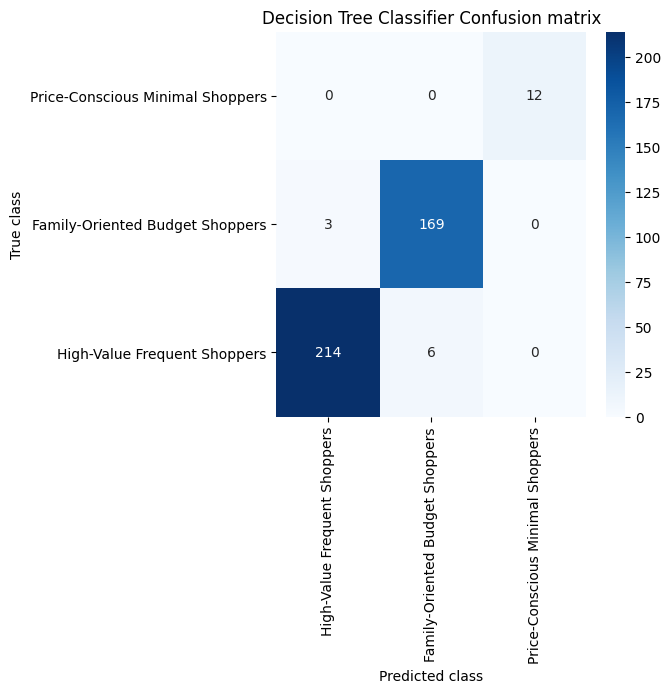

In [24]:
if os.path.exists('model/DTC.pkl'):
    # Load the trained model from the file
    DTC = joblib.load('model/DTC.pkl')
    print("Model loaded successfully.")
    predict = DTC.predict(X_test)
    calculateMetrics("Decision Tree Classifier", predict, y_test)
else:
    DTC = DecisionTreeClassifier()
    DTC.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(DTC, 'model/DTC.pkl')
    print("Model saved successfully.") 
    predict = DTC.predict(X_test)
    calculateMetrics("Decision Tree Classifier", predict, y_test)

In [25]:
testdata = pd.read_csv('Datasets/testdata.csv')

In [26]:
test = testdata
test

,Education,Marital_Status,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response
0,Graduate,Partner,75236,1,216,27,1068,25,0,0,0
1,Graduate,Partner,44010,1,624,46,662,24,0,0,0
2,Graduate,Single,75127,0,38,92,833,19,0,0,0
3,Graduate,Single,34738,1,49,51,20,5,0,0,0
4,Graduate,Partner,76068,1,577,67,1376,10,2,0,0
5,Postgraduate,Partner,55951,1,675,62,1374,23,2,0,0
6,Graduate,Partner,58692,1,84,21,395,15,0,0,0
7,Graduate,Single,50785,2,292,27,114,8,0,0,0
8,Graduate,Partner,33178,1,150,9,49,5,0,0,0
9,Graduate,Partner,42554,2,533,93,41,7,0,0,0


In [27]:
le = LabelEncoder()

for i in test.columns:
    if test[i].dtype=='object':
        test[i]=le.fit_transform(test[i])
        
test

,Education,Marital_Status,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response
0,0,0,75236,1,216,27,1068,25,0,0,0
1,0,0,44010,1,624,46,662,24,0,0,0
2,0,1,75127,0,38,92,833,19,0,0,0
3,0,1,34738,1,49,51,20,5,0,0,0
4,0,0,76068,1,577,67,1376,10,2,0,0
5,1,0,55951,1,675,62,1374,23,2,0,0
6,0,0,58692,1,84,21,395,15,0,0,0
7,0,1,50785,2,292,27,114,8,0,0,0
8,0,0,33178,1,150,9,49,5,0,0,0
9,0,0,42554,2,533,93,41,7,0,0,0


In [28]:

# Make predictions
predict = DTC.predict(test)
predict


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [29]:
test['Predication'] = [labels[pred] for pred in predict]
test

,Education,Marital_Status,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Predication
0,0,0,75236,1,216,27,1068,25,0,0,0,Family-Oriented Budget Shoppers
1,0,0,44010,1,624,46,662,24,0,0,0,Family-Oriented Budget Shoppers
2,0,1,75127,0,38,92,833,19,0,0,0,Family-Oriented Budget Shoppers
3,0,1,34738,1,49,51,20,5,0,0,0,High-Value Frequent Shoppers
4,0,0,76068,1,577,67,1376,10,2,0,0,Family-Oriented Budget Shoppers
5,1,0,55951,1,675,62,1374,23,2,0,0,Family-Oriented Budget Shoppers
6,0,0,58692,1,84,21,395,15,0,0,0,High-Value Frequent Shoppers
7,0,1,50785,2,292,27,114,8,0,0,0,High-Value Frequent Shoppers
8,0,0,33178,1,150,9,49,5,0,0,0,High-Value Frequent Shoppers
9,0,0,42554,2,533,93,41,7,0,0,0,High-Value Frequent Shoppers
